In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Importing the dataset

In [3]:
df=pd.read_csv("BreastCancer.csv")

In [5]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Gerneral informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Preprocessing

In [10]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [12]:
df.drop(['id'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [26]:
print("Missing values:",df.isnull().sum().sum())

Missing values: 0


# Data Visualization

B    357
M    212
Name: diagnosis, dtype: int64


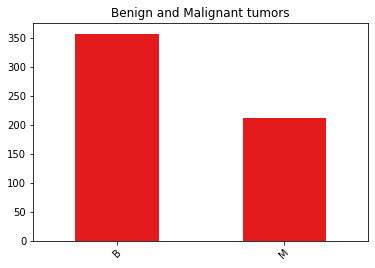

In [24]:
vc=df["diagnosis"].value_counts()
vc.plot.bar(rot=45,colormap="Set1",title="Benign and Malignant tumors")
print(vc)

* Categorical to Numerical

In [31]:
encoder=LabelEncoder()
df['diagnosis']=encoder.fit_transform(df['diagnosis'])

print(df['diagnosis'].value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


# Correlation Map

In [64]:
def plot_correlation_map( df ):


    corr=df.corr()
    s , ax = plt.subplots( figsize =(25 , 25 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    
    mask = np.triu(np.ones_like(corr, dtype=bool))

    s = sns.heatmap(

        corr, 

        cmap = cmap,
        
        mask=mask, 

        square=True, 

        cbar_kws={ 'shrink' : .7 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 13 }

        )

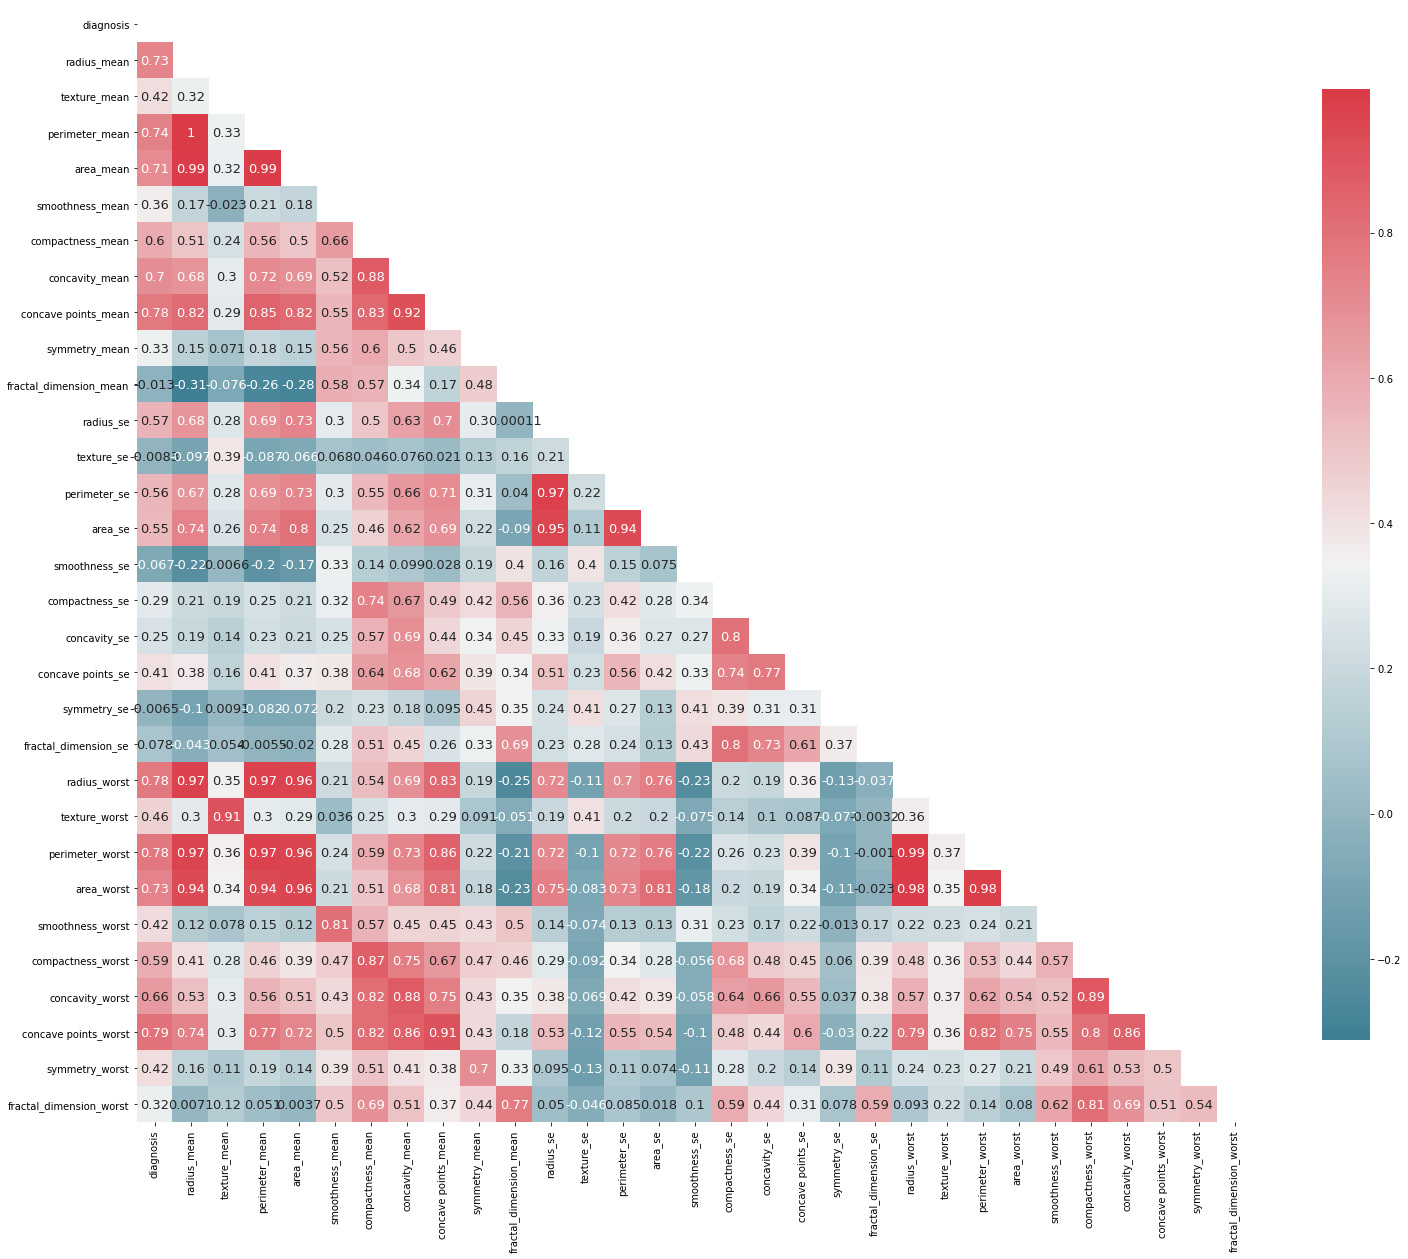

In [65]:
plot_correlation_map(df)

In [68]:
vc=df["concave points_worst"].value_counts()
vc

0.00000    13
0.04306     3
0.07431     3
0.05556     3
0.12180     3
           ..
0.09744     1
0.08436     1
0.19390     1
0.09331     1
0.04970     1
Name: concave points_worst, Length: 492, dtype: int64

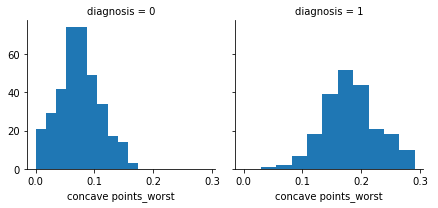

In [73]:
g=sns.FacetGrid(df,col='diagnosis')
g.map(plt.hist,"concave points_worst")
g.add_legend()

# we can notice:
 * mean value for number of concave portions of the contour < 0.1 Cancer is probably Benign
 * mean value for number of concave portions of the contour > 0.1 Cancer is probably Malignant

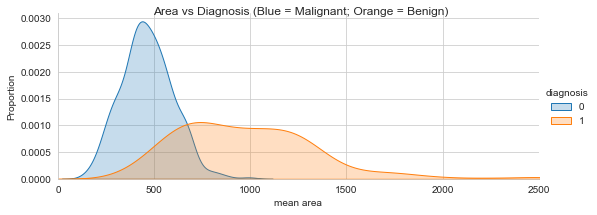

In [74]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="diagnosis",aspect=2.5)
plotOne.map(sns.kdeplot,'area_mean',shade=True)
plotOne.set(xlim=(0, df['area_mean'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('mean area', 'Proportion')
plotOne.fig.suptitle('Area vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()

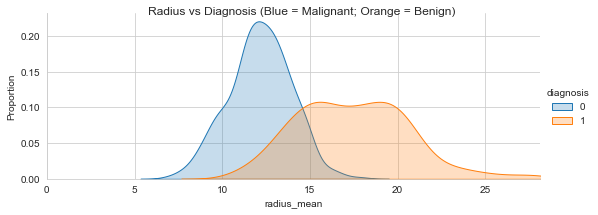

In [75]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="diagnosis",aspect=2.5)
plotOne.map(sns.kdeplot,'radius_mean',shade=True)
plotOne.set(xlim=(0, df['radius_mean'].max()))
plotOne.add_legend()
plotOne.set_axis_labels('radius_mean', 'Proportion')
plotOne.fig.suptitle('Radius vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()